In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import sys
sys.path.append('src/')

eps=1e-8

from main import *
from utils import *

Transformation fo the mat files into csv files

In [2]:
file=hdf5storage.loadmat('../school_splits/school_b.mat')
mat_to_csv(file)

In [3]:
data=pd.read_csv('../data/school_results.csv')

y_df=data[['grade']]
X_df=data.drop(['grade'],axis=1)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.25)

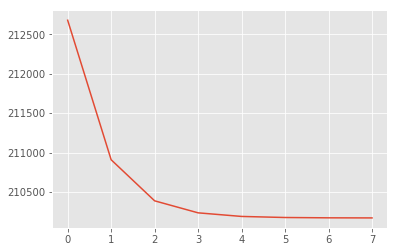

In [5]:
W,D,l,mineps,list_sqe=algo1_eps(X_train,y_train,gamma=1,tol=0.1,max_iter=20)
plt.plot(l)
plt.show()

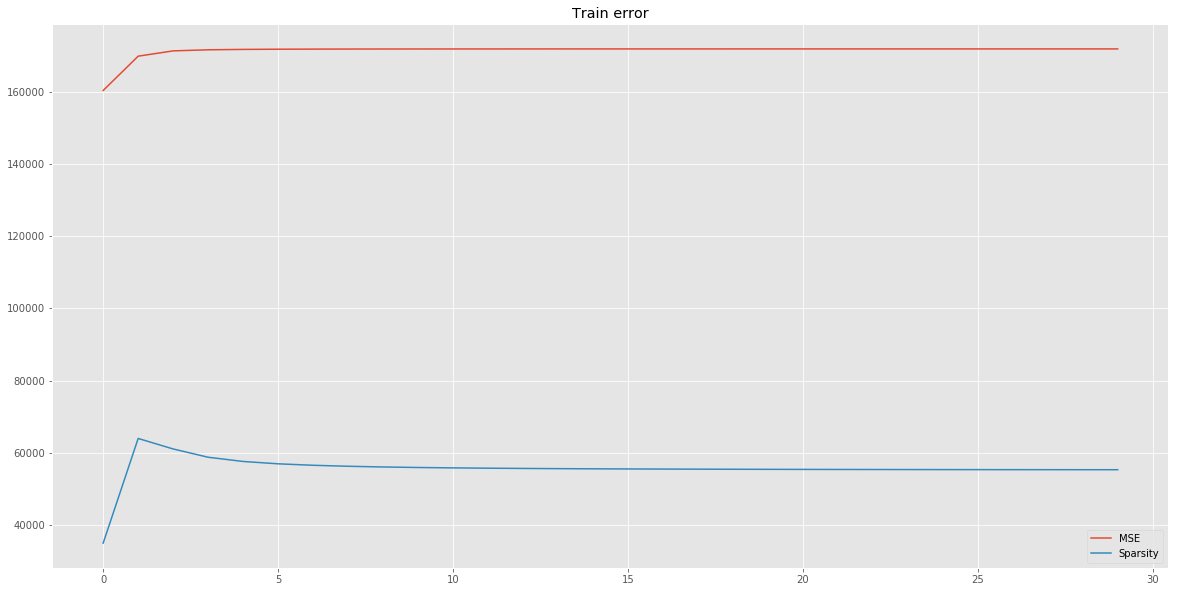

In [6]:
W,D,l,l_sqe,l_sparse=algo1(X_train,y_train,gamma=1,epsilon=0.01,tol=1e-5,max_iter=30)

plt.figure(figsize=(20,10))
plt.plot(l_sqe,label='MSE')
plt.plot(l_sparse,label='Sparsity')
plt.legend()
plt.title('Train error')
plt.show()

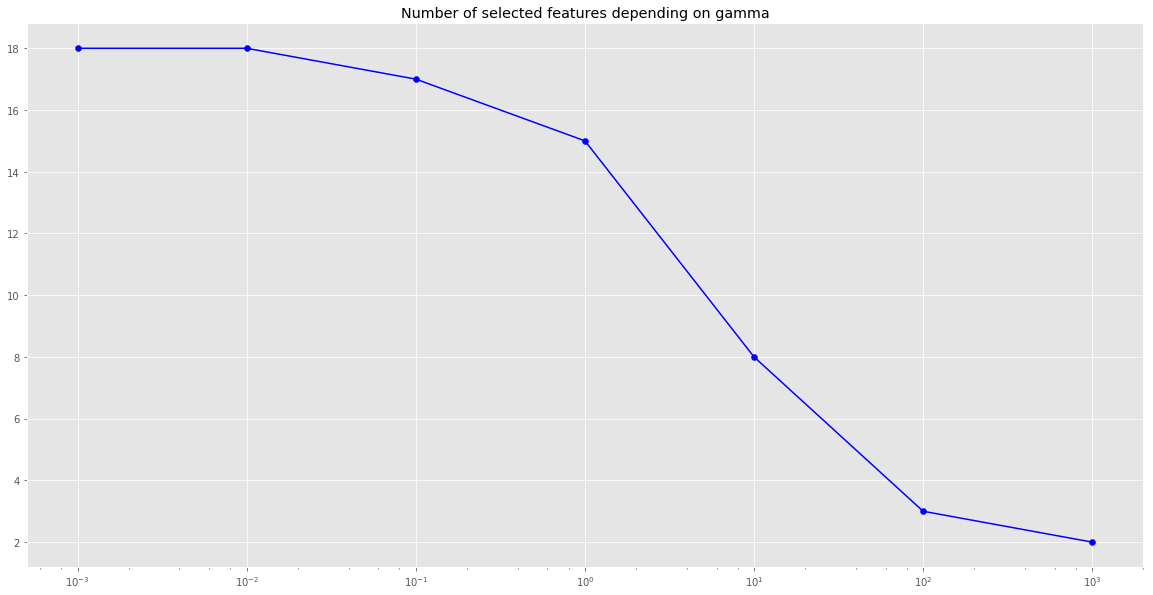

In [7]:
gammas=[]
n_feat=[]
for j in range(-3,4):
    gamma=10**(j)
    W,D,l,l_sqe,l_sparse=algo1(X_train,y_train,gamma,epsilon=0.01,tol=1e-5,max_iter=30)
    _,U=np.linalg.eig(D)
    A=np.dot(U.T,W)
    #print(gamma,[round(np.linalg.norm(a),1) for a in A])
    gammas.append(gamma)
    n_feat.append(len(np.where(np.array([round(np.linalg.norm(a),1) for a in A])>0)[0]))
plt.figure(figsize=(20,10))
plt.scatter(gammas,n_feat,c='b')
plt.plot(gammas,n_feat,c='b')
plt.xscale('log')
plt.title('Number of selected features depending on gamma')
plt.show()